In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from math import log2
from math import sqrt
from numpy import asarray
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import plotly.express as px
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
import glob
#import missingno as msno
import datetime
#from fbprophet import Prophet
%matplotlib inline
#import mplcyberpunk

In [3]:
df14 = pd.read_csv('../../Taipei_14.csv')
df15 = pd.read_csv('../../Taipei_15.csv')
df16 = pd.read_csv('../../Taipei_16.csv')
df17 = pd.read_csv('../../Taipei_17.csv')
df18 = pd.read_csv('../../Taipei_18.csv')
###########################################
df14 = df14.rename(columns={"PM2.5": "PM"})
df15 = df15.rename(columns={"PM2.5": "PM"})
df16 = df16.rename(columns={"PM2.5": "PM"})
df17 = df17.rename(columns={"PM2.5": "PM"})
df18 = df18.rename(columns={"PM2.5": "PM"})
df4= pd.DataFrame(df14)
df5= pd.DataFrame(df15)
df6= pd.DataFrame(df16)
df7= pd.DataFrame(df17)
df8= pd.DataFrame(df18)

In [4]:
r1=(df4[df14.SiteEngName =='Tamsui'])
(r1.PM)

8         26.0
26        28.0
44        31.0
62        35.0
80        36.0
          ... 
157598    22.0
157616    20.0
157634    20.0
157652    35.0
157670    58.0
Name: PM, Length: 8760, dtype: float64

In [5]:
r=(df4[df14.SiteEngName =='Banqiao'])
s=(df5[df15.SiteEngName =='Banqiao'])
t=(df6[df16.SiteEngName =='Banqiao'])
u=(df7[df17.SiteEngName =='Banqiao'])
v=(df8[df18.SiteEngName =='Banqiao'])
#print(r.PM==s.PM)
#print(r.PM)
p=r.PM
q=s.PM
p1=t.PM
q1=u.PM
p2=v.PM;

In [6]:
p

0         26.00
18        28.00
36        30.00
54        29.00
72        28.00
          ...  
157590    23.54
157608    24.58
157626    30.13
157644    41.21
157662    56.92
Name: PM, Length: 8760, dtype: float64

In [7]:
p01=np.array(p)
q01=np.array(q)
print(p01)

[26.   28.   30.   ... 30.13 41.21 56.92]


In [8]:
my_rho = np.corrcoef(p01,q01)
print(my_rho)

[[1.         0.15252571]
 [0.15252571 1.        ]]


In [9]:
my_rho[1]

array([0.15252571, 1.        ])

In [10]:
p.describe()

count    8760.000000
mean       22.259626
std        15.308937
min         1.000000
25%        12.000000
50%        19.000000
75%        28.000000
max       126.000000
Name: PM, dtype: float64

In [11]:
counts, bin_edges = np.histogram(p, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170])
print(counts)
y4=counts
counts, bin_edges = np.histogram(p1, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170])
print(counts)
y5=counts
counts, bin_edges = np.histogram(p1, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170])
print(counts)
y6=counts
counts, bin_edges = np.histogram(q1, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170])
print(counts)
y7=counts
counts, bin_edges = np.histogram(p2, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170])
print(counts)
y8=counts

[ 418  990 1652 1795  950  887  611  400  324  218  114  107   87   46
   58   33   15   21   20    7    7]
[ 950 1590 1550 1424 1100  604  470  271  249  200  125   88   78   39
   22   10    4    5    4    1    0]
[ 950 1590 1550 1424 1100  604  470  271  249  200  125   88   78   39
   22   10    4    5    4    1    0]
[ 832 2016 2008 1164  976  670  429  272  152  114   54   38   14   12
    5    3    1    0    0    0    0]
[ 629 1905 1663 1721 1084  727  456  213  165   85   42   37    3   11
    7    7    4    1    0    0    0]


In [12]:
an=np.array(y4)
an


array([ 418,  990, 1652, 1795,  950,  887,  611,  400,  324,  218,  114,
        107,   87,   46,   58,   33,   15,   21,   20,    7,    7],
      dtype=int64)

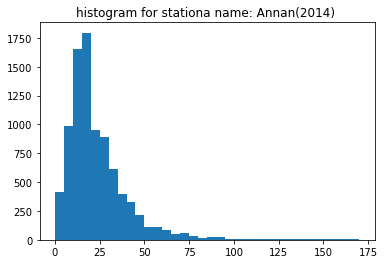

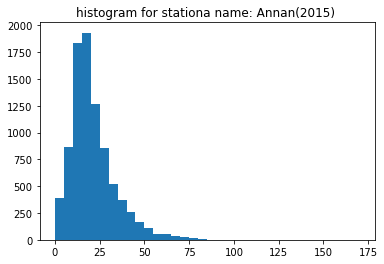

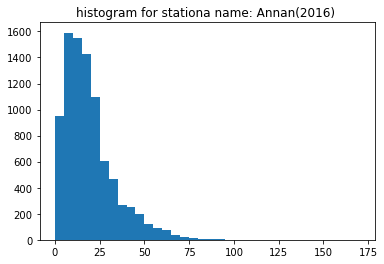

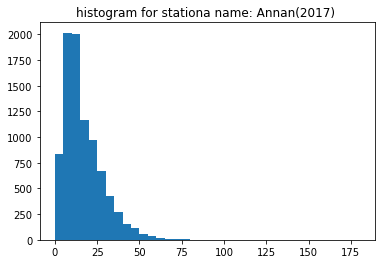

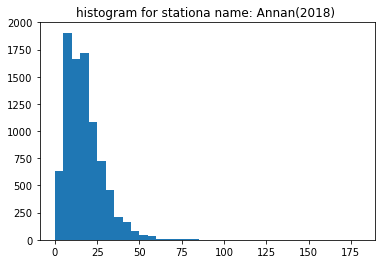

In [13]:
plt.hist(p, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170]) 
plt.title("histogram for stationa name: Annan(2014) ") 
plt.show()
plt.hist(q, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170]) 
plt.title("histogram for stationa name: Annan(2015) ") 
plt.show()
plt.hist(p1, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170]) 
plt.title("histogram for stationa name: Annan(2016) ") 
plt.show()
plt.hist(q1, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,180]) 
plt.title("histogram for stationa name: Annan(2017) ") 
plt.show()
plt.hist(p2, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,180]) 
plt.title("histogram for stationa name: Annan(2018) ") 
plt.show()

In [14]:
p.mean()

22.25962557077627

In [15]:
print(y4.mean())
print(y5.mean())
print(y6.mean())
print(y7.mean())
print(y8.mean())
print('minimum value')
print(y4.min())
print(y5.min())
print(y6.min())
print(y7.min())
print(y8.min())

417.14285714285717
418.2857142857143
418.2857142857143
417.14285714285717
417.14285714285717
minimum value
7
0
0
0
0


In [16]:
from time import sleep

print('Will it get printed immediately?', end='')
sleep(5)

Will it get printed immediately?

In [17]:
y4

array([ 418,  990, 1652, 1795,  950,  887,  611,  400,  324,  218,  114,
        107,   87,   46,   58,   33,   15,   21,   20,    7,    7],
      dtype=int64)

In [18]:
from scipy import stats
#rvs = stats.norm.rvs(loc = 5, scale = 10, size = (50,2))
print (stats.ttest_1samp(y4,25.0))
print (stats.ttest_1samp(y5,417.0))
print (stats.ttest_1samp(y6,418.0))
print (stats.ttest_1samp(y7,417))
print (stats.ttest_1samp(y8,417))


Ttest_1sampResult(statistic=3.3179896549281547, pvalue=0.003431664092336746)
Ttest_1sampResult(statistic=0.010591167755545618, pvalue=0.9916545654129002)
Ttest_1sampResult(statistic=0.0023535928345656404, pvalue=0.998145424373354)
Ttest_1sampResult(statistic=0.0010230459462152461, pvalue=0.9991938632967169)
Ttest_1sampResult(statistic=0.001029157781699295, pvalue=0.9991890473125421)


In [19]:
print('normaltest teststat = %6.3f pvalue = %6.4f' %
      stats.normaltest((y4-y4.mean())/y4.std()))

normaltest teststat =  9.845 pvalue = 0.0073


In [20]:
print('normaltest teststat = %6.3f pvalue = %6.4f' % stats.normaltest(y4))

normaltest teststat =  9.845 pvalue = 0.0073


In [21]:
print('normaltest teststat = %6.3f pvalue = %6.4f' %
      stats.normaltest((y4-y4.mean())/y4.std()))

normaltest teststat =  9.845 pvalue = 0.0073


In [22]:
d, pval = stats.kstest((y4-y4.mean())/y4.std(), 'norm')
print('KS-statistic D = %6.3f pvalue = %6.4f' % (d, pval))

KS-statistic D =  0.241 pvalue = 0.1484


In [23]:
print('t-statistic = %6.3f pvalue = %6.4f' %  stats.ttest_1samp(y4,417))

t-statistic =  0.001 pvalue = 0.9990


In [24]:
data = {
...     'a': [0.9, 1.0, 1.1, 1.2],
...     'b': [0.8, 0.9, 1.0, 1.1],
...     'c': [4.9, 5.0, 5.1, 5.2],
... }
from scipy.stats import f_oneway
t, p =  f_oneway(*data.values())
p

7.959305946158634e-12

In [25]:
np.random.seed(282629734)
x = stats.t.rvs(10, size=1000)
m, v, s, k = stats.t.stats(10, moments='mvsk')
n, (smin, smax), sm, sv, ss, sk = stats.describe(x)
sstr = '%-14s mean = %6.4f, variance = %6.4f, skew = %6.4f, kurtosis = %6.4f'
print(sstr % ('distribution:', m, v, s ,k))

print(sstr % ('sample:', sm, sv, ss, sk))
print('t-statistic = %6.3f pvalue = %6.4f' %  stats.ttest_1samp(x, m))
x.min()

distribution:  mean = 0.0000, variance = 1.2500, skew = 0.0000, kurtosis = 1.0000
sample:        mean = 0.0141, variance = 1.2903, skew = 0.2165, kurtosis = 1.0556
t-statistic =  0.391 pvalue = 0.6955


-3.7897557242248197

In [26]:
stats.describe(x)

DescribeResult(nobs=1000, minmax=(-3.7897557242248197, 5.263277329807165), mean=0.014061066398468422, variance=1.2902841462255106, skewness=0.21652778283120955, kurtosis=1.055594041706331)

In [27]:
print (stats.ttest_1samp(y4,4.0))


Ttest_1sampResult(statistic=3.495674346831411, pvalue=0.002277819738233034)


from math import log2
from math import sqrt
from numpy import asarray
 
# calculate the kl divergence
def kl_divergence(pr, qr):
	return sum(pr[i] * log2(pr[i]/qr[i]) for i in range(len(pr)))
pr=np.asarray(y4)
qr=np.asarray(y5)
def js_divergence(pr, qr):
	m = (0.5 * (pr + qr))
	return 0.5 * kl_divergence(pr, m) + (0.5 * kl_divergence(qr, m))
js_pq = js_divergence(pr, qr)
print('JS(P || Q) divergence: %.4f bits' % js_pq)
print('JS(P || Q) distance: %.3f' % sqrt(js_pq))

In [28]:
from scipy.spatial.distance import jensenshannon
from numpy import asarray
from scipy import stats


In [29]:
a=df14['SiteEngName'].unique()
opv=[]
js1=[]
for i in range(18):
    a1=(df4[df14.SiteEngName==a[i]])
    a2=(df5[df15.SiteEngName==a[i]])
    a3=(df6[df16.SiteEngName==a[i]])
    a4=(df7[df17.SiteEngName==a[i]])
    a5=(df8[df18.SiteEngName==a[i]])
    b1=a1.PM
    b2=a2.PM
    b3=a3.PM
    b4=a4.PM
    b5=a5.PM
    print('==============')
    print(a[i])
    counts, bin_edges = np.histogram(b1,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,370])
    y4=counts
    print(y4)
    counts, bin_edges = np.histogram(b2,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,370])
    y5=counts
    print(y5)
    counts, bin_edges = np.histogram(b3,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,370])
    y6=counts
    print(y6)
    counts, bin_edges = np.histogram(b4,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,370])
    y7=counts
    print(y7)
    counts, bin_edges = np.histogram(b5,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,370])
    y8=counts
    print(y8)
    print('=============')
    ye45=jensenshannon(y4,y5)
    ye46=jensenshannon(y4,y6)
    ye47=jensenshannon(y4,y7)
    ye48=jensenshannon(y4,y8)
    ye56=jensenshannon(y5,y6)
    ye57=jensenshannon(y5,y7)
    ye58=jensenshannon(y5,y8)
    ye67=jensenshannon(y6,y7)
    ye68=jensenshannon(y6,y8)
    ye78=jensenshannon(y7,y8)
    je=np.array([ye45,ye46,ye47,ye48,ye56,ye57,ye58,ye67,ye68,ye78])
    js1.append(je)
    print(je)
    print('normaltest teststat = %6.3f pvalue = %6.4f' % stats.normaltest(je))
    k2, op=stats.normaltest(je)
    print(op)
    opv.append(op)
    #a5.nlargest(20,['PM'])
    
    #print(js_divergence(ab4,ab5))
    #print(js_divergence(ab5,ab4))
    #print(js_divergence(y5,y6))
    #print(js_divergence(y6,y5))
    #print(js_divergence(y6,y7))
   # print(js_divergence(y7,y6))
   # print(js_divergence(y7,y8))
   # print(js_divergence(y8,y7))
    
    

Banqiao
[ 418  990 1652 1795  950  887  611  400  324  218  114  107   87   46
   58   33   15   21   20    7    7]
[ 393  868 1834 1932 1265  855  516  369  257  165  113   54   53   38
   25   16    4    2    1    0    0]
[ 950 1590 1550 1424 1100  604  470  271  249  200  125   88   78   39
   22   10    4    5    4    1    0]
[ 832 2016 2008 1164  976  670  429  272  152  114   54   38   14   12
    5    3    1    0    0    0    0]
[ 629 1905 1663 1721 1084  727  456  213  165   85   42   37    3   11
    7    7    4    1    0    0    0]
[0.07652382 0.130262   0.18194856 0.15927364 0.13610092 0.17255488
 0.14260695 0.09967608 0.10626174 0.07695153]
normaltest teststat =  1.124 pvalue = 0.5699
0.5699325962823711
Cailiao
[  42  400 1224 1876 1396 1326  865  441  394  207  191  133   79   62
   43   29   22   10    4    7    9]
[1743 1943 1482 1101  576  475  447  303  254  156  114   60   46   24
   19    7    7    1    1    1    0]
[ 286 1867 2233 1724 1147  585  335  225  166  113 

C:\Users\Khalid\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Datong
[1024 1572 1801 1571  946  654  485  243  159  117   68   39   34   12
    5    5    7    3    8    4    3]
[1098 1446 1793 1283 1146  645  486  348  204  119   62   45   27   21
   10   13    4    4    3    0    3]
[ 828 1471 1895 1432 1172  625  490  290  212  126   95   54   42   29
   14    3    0    2    1    0    0]
[1431 2003 1766 1326  731  464  332  277  162  104   76   52   24    4
    3    2    3    0    0    0    0]
[ 496 1699 2162 1763 1179  688  352  171  122   54   40   14    8    2
    4    2    3    1    0    0    0]
[0.05310138 0.0574124  0.08770754 0.10616404 0.04969383 0.09883648
 0.12730913 0.11509761 0.10368892 0.15512459]
normaltest teststat =  0.126 pvalue = 0.9388
0.9388376579565709
Guting
[ 623 1395 1689 1584 1075  790  524  345  255  159  101   82   44   28
   16   14    4    6    8   11    7]
[1425 1655 1577 1237  728  637  437  351  218  179   98   81   29   30
   24   10   20    9    6    3    6]
[ 635 1920 2102 1591  796  591  366  286  151  139  1

[1089 2133 1595 1596 1064  610  325  131  107   51   20   13   13    8
    3    2    0    0    0    0    0]
[0.11403999 0.1723833  0.28291956 0.26049142 0.09641945 0.20459422
 0.19124257 0.12502628 0.11954893 0.09074429]
normaltest teststat =  1.329 pvalue = 0.5146
0.5145516314941357
Xizhi
[ 380  857 1793 1519 1320  857  776  420  300  171  154   75   51   19
   19   11   12   12    4    1    9]
[ 511 1367 1893 1817 1146  646  559  362  175  119   58   30   24   16
   18    9    4    4    1    1    0]
[ 929 1655 2019 1589  984  614  378  213  177  114   63   17   20    8
    0    2    0    0    0    0    2]
[ 245 1302 1879 2041 1094  830  586  319  211  123   67   24   17   12
    6    0    1    1    1    1    0]
[1816 1731 1450 1475  894  697  286  175  113   69   27   11    7    1
    3    1    0    2    0    1    1]
[0.10540769 0.17118449 0.11038697 0.25051167 0.09410285 0.06902839
 0.18540855 0.13698919 0.11705889 0.22863537]
normaltest teststat =  1.097 pvalue = 0.5779
0.577936116

import pandas as pd 
import numpy as np 
  
# creating the Numpy array 
array = np.array([[1, 1, 1], [2, 4, 8], [3, 9, 27],  
                  [4, 16, 64], [5, 25, 125], [6, 36, 216],  
                  [7, 49, 343]]) 
  
# creating a list of index names 
index_values = ['first', 'second', 'third', 
                'fourth', 'fifth', 'sixth', 'seventh'] 
   
# creating a list of column names 
column_values = ['number', 'squares', 'cubes'] 
  
# creating the dataframe 
df = pd.DataFrame(data = array,  
                  index = index_values,  
                  columns = column_values) 
  
# displaying the dataframe 
print(df) 

In [30]:
 import scipy.stats as stats

#perform Chi-Square Goodness of Fit Test
stats.chisquare(f_obs=y4, f_exp=y5)

C:\Users\Khalid\anaconda3\lib\site-packages\scipy\stats\stats.py:6125: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs.astype(np.float64) - f_exp)**2 / f_exp


Power_divergenceResult(statistic=inf, pvalue=0.0)

In [31]:
 import scipy.stats as stats

#perform Chi-Square Goodness of Fit Test
stats.chisquare(f_obs=y5, f_exp=y4)

Power_divergenceResult(statistic=1944.975554714565, pvalue=0.0)

In [32]:
opv

[0.5699325962823711,
 0.31558932171814835,
 0.9388376579565709,
 0.8189747945749717,
 0.8156357030095018,
 0.34977452551882965,
 0.7813930455045675,
 0.04023411328800657,
 0.8037792761157498,
 0.486886090043013,
 0.3679822666821343,
 0.5858682758183493,
 0.3092763472357392,
 0.5145516314941357,
 0.5779361169181092,
 0.4020619713356102,
 0.2772019184052368,
 0.7591567235324999]

In [61]:
column_values=['P_JS'] 
df = pd.DataFrame(data = opv,  
                  index = a,  
                  columns = column_values) 
  
# displaying the dataframe 
print(df) 
print(df.nlargest(5, ['P_JS'])) 
df.nsmallest(5, ['P_JS'])

               P_JS
Banqiao    0.569933
Cailiao    0.315589
Datong     0.938838
Guting     0.818975
Linkou     0.815636
Sanchong   0.349775
Shilin     0.781393
Songshan   0.040234
Tamsui     0.803779
Tucheng    0.486886
Wanhua     0.367982
Wanli      0.585868
Xindian    0.309276
Xinzhuang  0.514552
Xizhi      0.577936
Yangming   0.402062
Yonghe     0.277202
Zhongshan  0.759157
            P_JS
Datong  0.938838
Guting  0.818975
Linkou  0.815636
Tamsui  0.803779
Shilin  0.781393


,P_JS
Songshan,0.040234
Yonghe,0.277202
Xindian,0.309276
Cailiao,0.315589
Sanchong,0.349775


In [34]:
asa=[0.7754073880573084,
 0.20137504695960357,
 0.9589203070589821,
 0.8943380789598223,
 0.5966485195385547,
 0.6685505362200235,
 0.5049997444317025,
 0.5416748040074162,
 0.5947003662735094,
 0.5541411327869887,
 0.7298593489310727,
 0.7835122801366879,
 0.08620368451347264,
 0.5736201214019737,
 0.5239802291312549,
 0.8946852900046157,
 0.31450817312992374,
 0.4747464815515344]


In [48]:
mmd=[0.6195491717067254,
 0.2726617744133159,
 0.3732057531316661,
 0.024605872889003576,
 0.08201897695496503,
 0.35163312726811136,
 0.1443268334535953,
 0.017744662492708955,
 0.7574069691378646,
 0.3980460092248173,
 0.046443340915259174,
 0.7823256356607653,
 0.0066848197053331155,
 0.13095368506208294,
 0.42965629475037503,
 0.3316241803202297,
 0.08997337120758593,
 0.3434020887918051]
column_values=['P_mmd'] 
dfmmd = pd.DataFrame(data = mmd,  
                  index = a,  
                  columns = column_values) 
print(dfmmd) 


              P_mmd
Banqiao    0.619549
Cailiao    0.272662
Datong     0.373206
Guting     0.024606
Linkou     0.082019
Sanchong   0.351633
Shilin     0.144327
Songshan   0.017745
Tamsui     0.757407
Tucheng    0.398046
Wanhua     0.046443
Wanli      0.782326
Xindian    0.006685
Xinzhuang  0.130954
Xizhi      0.429656
Yangming   0.331624
Yonghe     0.089973
Zhongshan  0.343402


In [50]:
column_values=['P_pear'] 
dfpear = pd.DataFrame(data = asa,  
                  index = a,  
                  columns = column_values) 
  
# displaying the dataframe 
print(dfpear) 
print(dfpear.nlargest(5, ['P_pear'])) 
dfpear.nsmallest(5, ['P_pear'])

             P_pear
Banqiao    0.775407
Cailiao    0.201375
Datong     0.958920
Guting     0.894338
Linkou     0.596649
Sanchong   0.668551
Shilin     0.505000
Songshan   0.541675
Tamsui     0.594700
Tucheng    0.554141
Wanhua     0.729859
Wanli      0.783512
Xindian    0.086204
Xinzhuang  0.573620
Xizhi      0.523980
Yangming   0.894685
Yonghe     0.314508
Zhongshan  0.474746
            P_pear
Datong    0.958920
Yangming  0.894685
Guting    0.894338
Wanli     0.783512
Banqiao   0.775407


,P_pear
Xindian,0.086204
Cailiao,0.201375
Yonghe,0.314508
Zhongshan,0.474746
Shilin,0.505000


import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
for i in range(18):
    plt.plot(opv[i],label=a[i])
#plt.plot(rv1[1],label=a[1])
#plt.plot(rv1[2],label=a[1])
plt.xlabel('Yearly Comparison')
plt.ylabel('Pearson -R value')
plt.legend()
plt.title('Pearson Vs Yearly Comparison')
plt.show()

#lines = df.plot.line(rot=0,figsize(18,6))
ax11 = df.plot.line(figsize=(18,6))
ax11p = dfpear.plot.line(figsize=(18,6))
plt.title('Pearson Vs Yearly Comparison')


             Pvalue
Banqiao    0.775407
Cailiao    0.201375
Datong     0.958920
Guting     0.894338
Linkou     0.596649
Sanchong   0.668551
Shilin     0.505000
Songshan   0.541675
Tamsui     0.594700
Tucheng    0.554141
Wanhua     0.729859
Wanli      0.783512
Xindian    0.086204
Xinzhuang  0.573620
Xizhi      0.523980
Yangming   0.894685
Yonghe     0.314508
Zhongshan  0.474746


Text(0.5, 1.0, 'MMD')

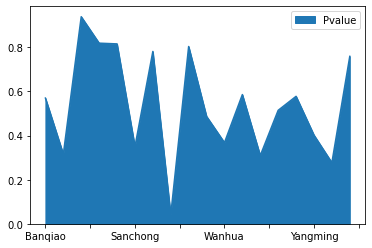

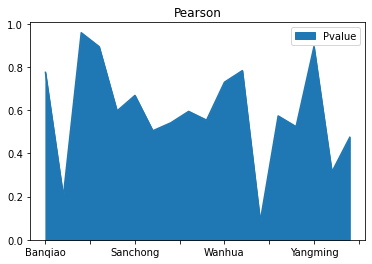

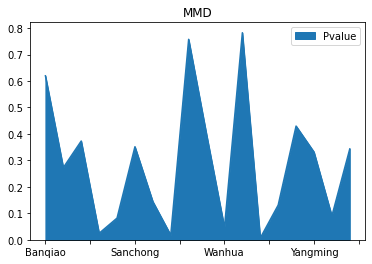

In [38]:
df.plot(kind='area')
dfpear.plot(kind='area')
plt.title('Pearson')

dfmmd.plot(kind='area')

print(dfpear) 

plt.title('MMD')


In [47]:
df
dfmmd

,Pvalue
Banqiao,0.619549
Cailiao,0.272662
Datong,0.373206
Guting,0.024606
Linkou,0.082019
Sanchong,0.351633
Shilin,0.144327
Songshan,0.017745
Tamsui,0.757407
Tucheng,0.398046


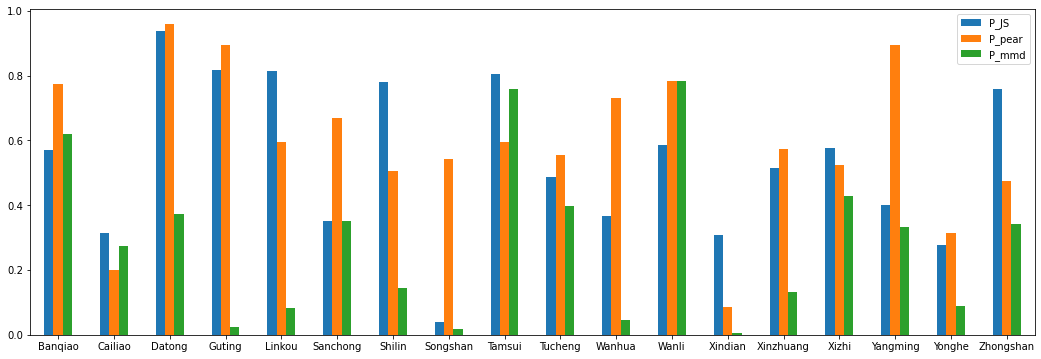

In [62]:
#ax14p = df.plot.bar(rot=0, figsize=(18, 6))
#ax14pear = dfpear.plot.bar(rot=0, figsize=(18, 6))
#ax14mmd = dfpear.plot.bar(rot=0, figsize=(18, 6))
dfs = [df, dfpear, dfmmd]
dfs = [df.set_index(a) for df in dfs]
dfp=dfs[0].join(dfs[1:])
#ax14mmds = dfs.plot.bar(rot=0, figsize=(18, 6))
dfp
ax14mmd = dfp.plot.bar(rot=0, figsize=(18, 6))


merged_df = pd.merge(df, dfpear, on="Pvalue")
dfa = pd.merge(merged_df, dfmmd, on="Pvalue")
print(dfa)

In [39]:
df.nlargest(5, ['Pvalue'])

,Pvalue
Datong,0.938838
Guting,0.818975
Linkou,0.815636
Tamsui,0.803779
Shilin,0.781393


In [40]:
df.nsmallest(5, ['Pvalue'])

,Pvalue
Songshan,0.040234
Yonghe,0.277202
Xindian,0.309276
Cailiao,0.315589
Sanchong,0.349775


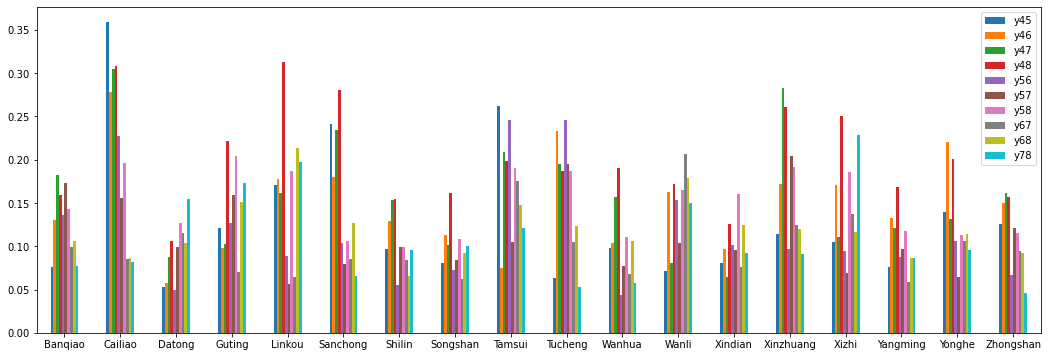

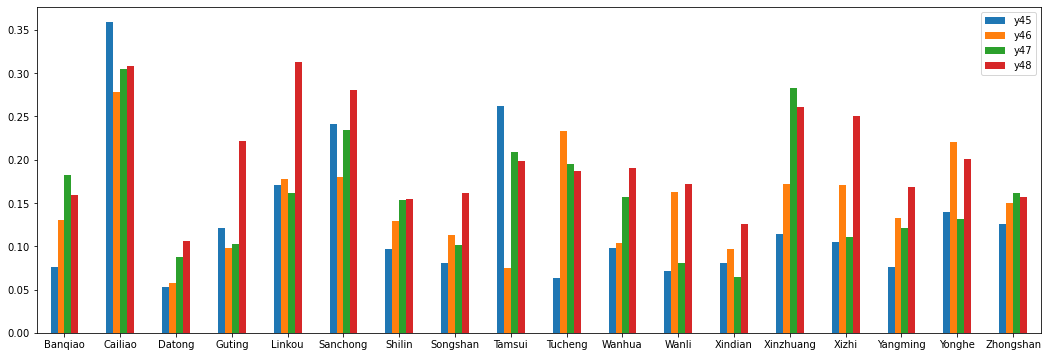

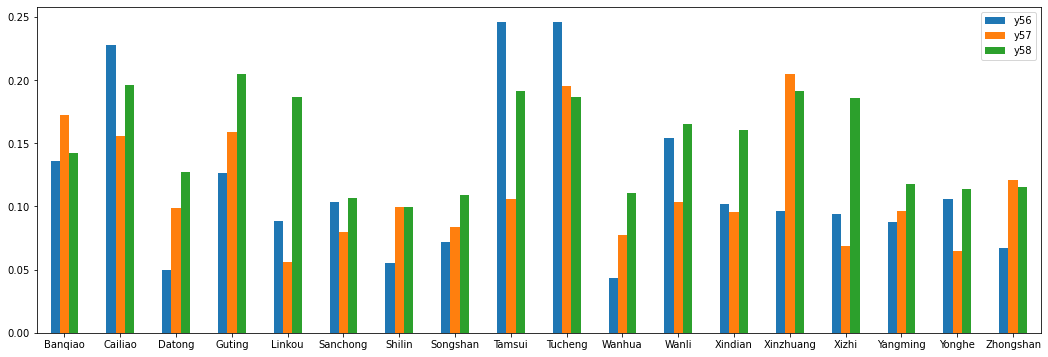

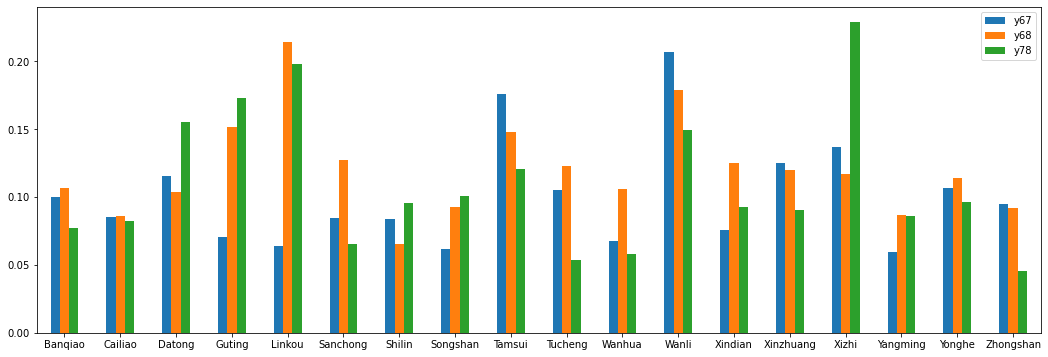

In [41]:
column_values=['Pvalue'] 
dfr = pd.DataFrame(data = js1,  
                  index = a,  
                  columns =['y45', 'y46', 'y47', 'y48','y56','y57','y58','y67','y68','y78']) 

# displaying the dataframe 
#print(dfr) 
y45=dfr.y45
y46=dfr.y46
y47=dfr.y47
y48=dfr.y48
y56=dfr.y56
y57=dfr.y57
y58=dfr.y58
y67=dfr.y67
y68=dfr.y68
y78=dfr.y78



dfz = pd.DataFrame({'y45': y45,
'y46': y46,'y47': y47,'y48': y48,'y56': y56,'y57': y57,'y58': y58,'y58': y58,'y67':y67,'y68':y68,'y78':y78}, index=a)
dfz4 = pd.DataFrame({'y45': y45,
'y46': y46,'y47': y47,'y48': y48},index=a)
dfz5 = pd.DataFrame({'y56': y56,'y57': y57,'y58': y58,'y58': y58},index=a)
dfz6 = pd.DataFrame({'y67':y67,'y68':y68,'y78':y78},index=a)
ax1 = dfz.plot.bar(rot=0, figsize=(18, 6))
ax14 = dfz4.plot.bar(rot=0, figsize=(18, 6))
ax15 = dfz5.plot.bar(rot=0, figsize=(18, 6))
ax16 = dfz6.plot.bar(rot=0, figsize=(18, 6))

TypeError: distplot() got an unexpected keyword argument 'name'

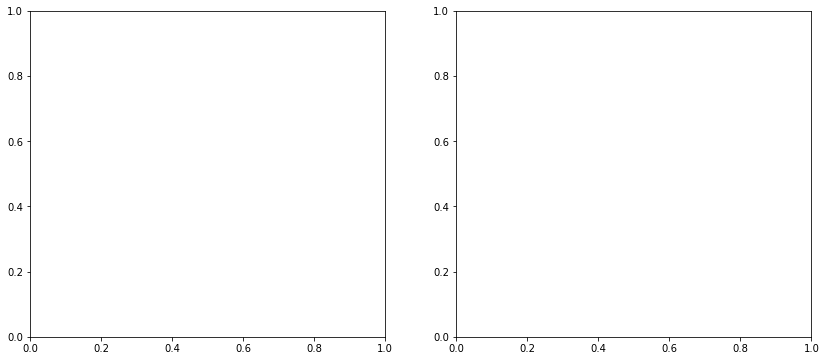

In [42]:
f,ax=plt.subplots(1,2,figsize=(14,6))
sns.distplot(df14[df14['SiteEngName']=='Datong'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4.0,'color':'teal' ,'label':'Year-14',},name="x variable",
             ax=ax[0])

In [ ]:
f,ax=plt.subplots(1,2,figsize=(14,6))
plt.title('Datong')
sns.distplot(df14[df14['SiteEngName']=='Datong'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('Dongshan')     
sns.distplot(df15[df15['SiteEngName']=='Datong'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Datong'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Datong'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Datong'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
plt.title('Dongshan')     
sns.distplot(df18[df18['SiteEngName']=='Datong'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Datong'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])


In [ ]:
#plt.title('Shanhua')
f,ax=plt.subplots(1,2,figsize=(14,6))
plt.title('Shanhua')
sns.distplot(df14[df14['SiteEngName']=='Shanhua'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
#plt.title('Shanhua',ax=ax[0])    
sns.distplot(df15[df15['SiteEngName']=='Shanhua'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Shanhua'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Shanhua'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Shanhua'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
#plt.title('Dongshan')     
sns.distplot(df18[df18['SiteEngName']=='Shanhua'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Shanhua'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])


In [ ]:
f,ax=plt.subplots(1,2,figsize=(14,6))
plt.title('PM2.5 and DIR')
sns.distplot(df14[df14['SiteEngName']=='Xinying'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('Xinying')     
sns.distplot(df15[df15['SiteEngName']=='Xinying'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Xinying'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Xinying'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Xinying'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Xinying'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Xinying'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
plt.title('PM2.5 and DIR')
sns.distplot(df14[df14['SiteEngName']=='Puli'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('Puli')     
sns.distplot(df15[df15['SiteEngName']=='Puli'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Puli'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Puli'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Puli'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Puli'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Puli'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
plt.title('PM2.5 and DIR')
sns.distplot(df14[df14['SiteEngName']=='Datong'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('Datong')     
sns.distplot(df15[df15['SiteEngName']=='Datong'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Datong'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Datong'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Datong'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Datong'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Datong'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
plt.title('PM2.5 and DIR')
sns.distplot(df14[df14['SiteEngName']=='Datong'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('Datong')     
sns.distplot(df15[df15['SiteEngName']=='Datong'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Datong'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Datong'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Datong'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Datong'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Datong'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])

In [ ]:
#"Chiayi	0.037214
#Songshan	0.040234
#Fengyuan	0.043167
#Xingang	0.076680
#Sanyi	0.176619"

In [ ]:
f,ax=plt.subplots(1,2,figsize=(14,6))
plt.title('PM2.5 and DIR')
sns.distplot(df14[df14['SiteEngName']=='Chiayi'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('Chiayi')     
sns.distplot(df15[df15['SiteEngName']=='Chiayi'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Chiayi'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Chiayi'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Chiayi'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Chiayi'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Chiayi'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])


In [ ]:
f,ax=plt.subplots(1,2,figsize=(14,6))
plt.title('PM2.5 and DIR')
sns.distplot(df14[df14['SiteEngName']=='Songshan'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('Songshan')     
sns.distplot(df15[df15['SiteEngName']=='Songshan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Songshan'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Songshan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Songshan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Songshan'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Songshan'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])


In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,6))
plt.title('PM2.5 and DIR')
sns.distplot(df14[df14['SiteEngName']=='Fengyuan'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('Fengyuan')     
sns.distplot(df15[df15['SiteEngName']=='Fengyuan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Fengyuan'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Fengyuan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Fengyuan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Fengyuan'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Fengyuan'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])


In [ ]:
f,ax=plt.subplots(1,2,figsize=(14,6))
plt.title('PM2.5 and DIR')
sns.distplot(df14[df14['SiteEngName']=='Xingang'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('Xingang')     
sns.distplot(df15[df15['SiteEngName']=='Xingang'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Xingang'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Xingang'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Xingang'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Xingang'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Xingang'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])


In [ ]:
f,ax=plt.subplots(1,2,figsize=(14,6))
plt.title('PM2.5 and DIR')
sns.distplot(df14[df14['SiteEngName']=='Sanyi'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('Sanyi')     
sns.distplot(df15[df15['SiteEngName']=='Sanyi'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Sanyi'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Sanyi'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Sanyi'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Sanyi'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Sanyi'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])


In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,6))
sns.distplot(df14[df14['SiteEngName']=='Xinying'].PM,ax=ax[0])
sns.distplot(df15[df15['SiteEngName']=='Xinying'].PM,ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Xinying'].PM,ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Xinying'].PM,ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Xinying'].PM,ax=ax[0])

sns.distplot(df14[df14['SiteEngName']=='Xinying'].PM,ax=ax[1])
sns.distplot(df17[df17['SiteEngName']=='Xinying'].PM,ax=ax[1])
sns.distplot(df18[df18['SiteEngName']=='Xinying'].PM,ax=ax[1])


In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,6))
sns.distplot(df14[df14['SiteEngName']=='Chiayi'].PM,
             kde=True,hist=True,bins=100,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
            
sns.distplot(df15[df15['SiteEngName']=='Chiayi'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Chiayi'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Chiayi'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Chiayi'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df14[df14['SiteEngName']=='Chiayi'].PM,ax=ax[1])
sns.distplot(df17[df17['SiteEngName']=='Chiayi'].PM,ax=ax[1])
sns.distplot(df18[df18['SiteEngName']=='Chiayi'].PM,ax=ax[1])

In [ ]:
f,ax=plt.subplots(1,2,figsize=(14,6))
plt.title('PM2.5 and DIR')
sns.distplot(df14[df14['SiteEngName']=='Songshan'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('PM2.5 and DIR')     
sns.distplot(df15[df15['SiteEngName']=='Songshan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Songshan'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Songshan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Songshan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Songshan'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Songshan'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])


In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,6))
sns.distplot(df14[df14['SiteEngName']=='Songshan'].PM,ax=ax[0])
sns.distplot(df15[df15['SiteEngName']=='Songshan'].PM,ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Songshan'].PM,ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Songshan'].PM,ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Songshan'].PM,ax=ax[0])

sns.distplot(df14[df14['SiteEngName']=='Songshan'].PM,ax=ax[1])
sns.distplot(df15[df15['SiteEngName']=='Songshan'].PM,ax=ax[1])
sns.distplot(df18[df18['SiteEngName']=='Songshan'].PM,ax=ax[1])

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,6))
sns.distplot(df14[df14['SiteEngName']=='Chiayi'].PM,ax=ax[0])
sns.distplot(df15[df15['SiteEngName']=='Chiayi'].PM,ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Chiayi'].PM,ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Chiayi'].PM,ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Chiayi'].PM,ax=ax[0])

sns.distplot(df14[df14['SiteEngName']=='Chiayi'].PM,ax=ax[1])
sns.distplot(df15[df15['SiteEngName']=='Chiayi'].PM,ax=ax[1])
sns.distplot(df18[df18['SiteEngName']=='Chiayi'].PM,ax=ax[1])

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,6))
sns.distplot(df14[df14['SiteEngName']=='Fengyuan'].PM,ax=ax[0])
sns.distplot(df15[df15['SiteEngName']=='Fengyuan'].PM,ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Fengyuan'].PM,ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Fengyuan'].PM,ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Fengyuan'].PM,ax=ax[0])

sns.distplot(df14[df14['SiteEngName']=='Fengyuan'].PM,ax=ax[1])
sns.distplot(df15[df15['SiteEngName']=='Fengyuan'].PM,ax=ax[1])
sns.distplot(df18[df18['SiteEngName']=='Fengyuan'].PM,ax=ax[1])

In [ ]:
MAX = 100000
  
def Print3Smallest(arr, n): 
    firstmin = MAX
    secmin = MAX
    thirdmin = MAX
  
    for i in range(0, n): 
          
        # Check if current element 
        # is less than firstmin,  
        # then update first,second 
        # and third 
  
        if arr[i] < firstmin: 
            thirdmin = secmin 
            secmin = firstmin 
            firstmin = arr[i] 
  
        # Check if current element is 
        # less than secmin then update 
        # second and third 
        elif arr[i] < secmin: 
            thirdmin = secmin 
            secmin = arr[i] 
  
        # Check if current element is 
        # less than,then upadte third 
        elif arr[i] < thirdmin: 
            thirdmin = arr[i] 
  
    print("First min = ", firstmin) 
    print("Second min = ", secmin) 
    print("Third min = ", thirdmin) 
  
  
# driver program 
arr = opv
n = len(arr) 
Print3Smallest(arr, n) 

In [ ]:
import sys 
  
# Function to print largest element in 
# first half and second half of an array 
def findMax(arr, n) : 
  
    # To store the maximum element 
    # in the first half 
    maxFirst = -sys.maxsize - 1
  
    # Middle index of the array 
    mid = n // 2; 
  
    # Calculate the maximum element 
    # in the first half 
    for i in range(0, mid): 
        maxFirst = max(maxFirst, arr[i]) 
  
    # If the size of array is odd then 
    # the middle element will be included 
    # in both the halves 
    if (n % 2 == 1): 
        maxFirst = max(maxFirst, arr[mid]) 
  
    # To store the maximum element 
    # in the second half 
    maxSecond = -sys.maxsize - 1
  
    # Calculate the maximum element 
    # int the second half 
    for i in range(mid, n): 
        maxSecond = max(maxSecond, arr[i]) 
  
    # Print the found maximums 
    print(maxFirst, ",", maxSecond) 
  
# Driver code 
arr = opv
n = len(arr) 
  
findMax(arr, n) 

In [ ]:
opv

In [ ]:
np.concatenate([a,opv])

In [ ]:
import heapq
import numpy
a = numpy.array([1, 3, 2, 4, 5])
heapq.nlargest(3, range(len(a)), a.take)


In [ ]:
a

In [ ]:

ak = numpy.array(opv)
heapq.nlargest(10, range(len(a)), a.take)

In [ ]:
print(js_divergence(y4,y5))
print(js_divergence(y5,y4))
print(js_divergence(y5,y6))
print(js_divergence(y6,y5))
print(js_divergence(y6,y7))
print(js_divergence(y7,y6))
print(js_divergence(y7,y8))
print(js_divergence(y8,y7))

In [ ]:
a=df14['SiteEngName'].unique()
for i in range(76):
    a1=(df4[df14.SiteEngName==a[i]])
    a2=(df5[df15.SiteEngName==a[i]])
    a3=(df6[df16.SiteEngName==a[i]])
    a4=(df7[df17.SiteEngName==a[i]])
    a5=(df8[df18.SiteEngName==a[i]])
    b1=a1.PM
    b2=a2.PM
    b3=a3.PM
    b4=a4.PM
    b5=a5.PM
    print(a[i])
    counts, bin_edges = np.histogram(b1,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170])
    ab4=counts
    print(ab4)
    counts, bin_edges = np.histogram(b2,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170])
    ab5=counts
    print(ab5)
    counts, bin_edges = np.histogram(b3,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170])
    ab6=counts
    print(ab6)
    counts, bin_edges = np.histogram(b4,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170])
    ab7=counts
    print(ab7)
    counts, bin_edges = np.histogram(b5,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170])
    ab8=counts
    print(ab8)
    print('=============')
    print(js_divergence(ab4,ab5))
    print(js_divergence(ab5,ab4))
    #print(js_divergence(y5,y6))
    #print(js_divergence(y6,y5))
    #print(js_divergence(y6,y7))
   # print(js_divergence(y7,y6))
   # print(js_divergence(y7,y8))
   # print(js_divergence(y8,y7))

    

In [ ]:
a=df14['SiteEngName'].unique()
for i range(76):
    a1=(df4[df14.SiteEngName==a[i]])
    a2=(df5[df15.SiteEngName==a[i]])
    a3=(df6[df16.SiteEngName==a[i]])
    a4=(df7[df17.SiteEngName==a[i]])
    a5=(df8[df18.SiteEngName==a[i]])
    y4=a1.PM
    y5=a2.PM
    y6=a3.PM
    y7=a4.PM
    y8=a5.PM
    print(a[i])
    print(========)
    print()


    

In [ ]:
from numpy import arange
from matplotlib import pyplot
from scipy.stats import norm
# define the distribution parameters
sample_space = arange(0, 166, 0.1)
mean = 29.5
stdev = 21.06
# calculate the pdf
pdf = norm.pdf(sample_space, mean, stdev)
# plot
a=pdf
pyplot.plot(sample_space, pdf)
pyplot.show()

In [ ]:
print(pdf)

In [ ]:
from numpy import arange
from matplotlib import pyplot
from scipy.stats import norm
# define the distribution parameters
sample_space = arange(0, 166, 0.1)
mean = 24.24
stdev = 18.27
# calculate the pdf
pdf = norm.pdf(sample_space, mean, stdev)
# plot
b=pdf
pyplot.plot(sample_space, pdf)
pyplot.show()

In [ ]:
import numpy as np

def KL(a, b):
    a = np.asarray(a, dtype=np.float)
    b = np.asarray(b, dtype=np.float)

    return np.sum(np.where(a != 0, a * np.log(a / b), 0))


#values1 = p
#values2 = q
print(KL(a,b))

In [ ]:
print(KL(b,a))

In [ ]:
r.PM

In [ ]:
qw=r.PM[((r.PM)>50) & ((r.PM)<100)].std()

In [ ]:
qw

In [ ]:
qw=r.PM[((r.PM)>50) & ((r.PM)<100)]

In [ ]:
qw.count()

In [ ]:
plt.style.use('ggplot')
plt.hist(p, bins=10)
plt.show()

In [ ]:
from scipy.spatial.distance import jensenshannon
from numpy import asarray

In [ ]:
def js_div(pr, qr):
	m = (0.5 * (pr + qr))
	return ((0.5 * KL(pr, m)) + (0.5 * KL(qr, m)))
js_pq = js_div(pr, qr)


In [ ]:
js_div(pr, qr)

In [ ]:
print(KL(y4,y5))

In [ ]:
print(KL(y4,y5))
print(KL(y5,y4))
print(KL(y5,y6))
print(KL(y6,y5))
print(KL(y6,y7))
print(KL(y7,y6))
print(KL(y7,y8))
print(KL(y8,y7))

In [ ]:
y4[i]

In [ ]:
y4[2]

In [ ]:
from math import log2
 
# calculate the kl divergence
def kl_divergence(p14, q14):
	return sum(p14[i] * log2(p14[i]/q14[i]) for i in range(len(p14)))
 
# define distributions
#p = [0.10, 0.40, 0.50]
#q = [0.80, 0.15, 0.05]
p14=y4
q14=y5
# calculate (P || Q)
kl_pq = kl_divergence(p14, q14)
print('KL(P || Q): %.3f bits' % kl_pq)
# calculate (Q || P)
kl_qp = kl_divergence(q14, p14)
print('KL(Q || P): %.3f bits' % kl_qp)

In [ ]:
kl_pq

In [ ]:
from scipy import stats
pq=391.978
qp=339.919
#ats.ttest_ind(pq,qp,eual_var = True)

In [ ]:
rvs1=p
rvs2=q
stats.ttest_ind(rvs2,rvs1)

In [ ]:
y4

In [ ]:
rvs1 = stats.norm.rvs(y4)
rvs2=stats.norm.rvs(y5)

In [ ]:
stats.ttest_ind(rvs2,rvs1)

In [ ]:
stats.ttest_ind(rvs1,rvs)

In [ ]:
stats.ttest_ind(y4,y5)
stats.ttest_ind(y5,y6)
stats.ttest_ind(y6,y5)

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
def boot_matrix(z, B):
    """Bootstrap sample
    
    Returns all bootstrap samples in a matrix"""
    
    n = len(z)  # sample size
    idz = np.random.randint(0, n, size=(B, n))  # indices to pick for all boostrap samples
    return z[idz]


In [ ]:
def bootstrap_t_pvalue(x, y, equal_var=False, B=100000, plot=False):
    """Bootstrap p values for two-sample t test
    
    Returns boostrap p value, test statistics and parametric p value"""
    
    # Original t test statistic
    orig = stats.ttest_ind(x, y, equal_var=equal_var)
    
    # Generate boostrap distribution of t statistic
    xboot = boot_matrix(x - x.mean(), B=B) # important centering step to get sampling distribution under the null
    yboot = boot_matrix(y - y.mean(), B=B)
    sampling_distribution = stats.ttest_ind(xboot, yboot, axis=1, equal_var=equal_var)[0]

    # Calculate proportion of bootstrap samples with at least as strong evidence against null    
    p = np.mean(sampling_distribution >= orig[0])
    
    # RESULTS
    print("p value for null hypothesis of equal population means:")
    print("Parametric:", orig[1])
    print("Bootstrap:", 2*min(p, 1-p))
    
    # Plot bootstrap distribution
    if plot:
        plt.figure()
        plt.hist(sampling_distribution, bins="fd")

In [ ]:
#np.random.seed(984564) # for reproducability
#x = np.random.normal(loc=11, scale=20, size=30)
#y = np.random.normal(loc=15, scale=20, size=20)
x=y4
y=y5
%time bootstrap_t_pvalue(x, y)

In [ ]:
x

In [ ]:
#np.random.seed(345244) # for reproducability
#x = np.random.normal(loc=11, scale=20, size=30)
#y = np.random.normal(loc=15, scale=10, size=20)
bootstrap_t_pvalue(x, y, plot=True)

In [ ]:
bootstrap_t_pvalue(y4, y5, plot=True)

In [ ]:
bootstrap_t_pvalue(y5, y4, plot=True)

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
np.random.seed(6)
population_ages1=stats.poisson.rvs(loc=18,mu=35,size=150000)
population_ages2=stats.poisson.rvs(loc=18,mu=10,size=100000)
population_ages=np.concatenate((population_ages1,population_ages2))
gujarat_ages1=stats.poisson.rvs(loc=18,mu=30,size=30)
gujarat_ages2=stats.poisson.rvs(loc=18,mu=10,size=20)
gujarat_ages=np.concatenate((gujarat_ages1,gujarat_ages2))
population_ages.mean()

In [ ]:
from scipy import stats
rvs = stats.norm.rvs(loc = 5, scale = 10, size = (50,2))
print (stats.ttest_1samp(rvs,5.0))

In [ ]:
print (stats.ttest_1samp(y4,10.0))

In [ ]:
#J_S Divergence

In [ ]:
from math import log2
from math import sqrt
from numpy import asarray
 
# calculate the kl divergence
def kl_divergence(pr, qr):
	return sum(pr[i] * log2(pr[i]/qr[i]) for i in range(len(pr)))
pr=np.asarray(y4)
qr=np.asarray(y5)
def js_divergence(pr, qr):
	m = (0.5 * (pr + qr))
	return 0.5 * kl_divergence(pr, m) + (0.5 * kl_divergence(qr, m))
js_pq = js_divergence(pr, qr)
print('JS(P || Q) divergence: %.3f bits' % js_pq)
print('JS(P || Q) distance: %.3f' % sqrt(js_pq))


In [ ]:
y4

In [ ]:
from math import log2
from math import sqrt
from numpy import asarray
 
# calculate the kl divergence
def kl_divergence(pr, qr):
	return sum(pr[i] * log2(pr[i]/qr[i]) for i in range(len(pr)))
kl_pq = kl_divergence(pr, qr)
print('KL(P || Q): %.3f bits' % kl_pq)
# calculate (Q || P)
kl_qp = kl_divergence(qr, pr)
print('KL(Q || P): %.3f bits' % kl_qp)

In [ ]:
...
# calculate JS(Q || P)
js_qp = js_divergence(qr, pr)
print('JS(Q || P) divergence: %.3f bits' % js_qp)
print('JS(Q || P) distance: %.3f' % sqrt(js_qp))

In [ ]:
from scipy.spatial.distance import jensenshannon
from numpy import asarray
# define distributions
#p = asarray([0.10, 0.40, 0.50])
#q = asarray([0.80, 0.15, 0.05])
# calculate JS(P || Q)
js_pq = jensenshannon(pr, qr,base=2)
print('JS(P || Q) Distance: %.3f' % js_pq)
# calculate JS(Q || P)
js_qp = jensenshannon(qr, pr, base=2)
print('JS(Q || P) Distance: %.3f' % js_qp)

In [ ]:
print(jensenshannon(pr, qr))
print(jensenshannon(qr, pr))

In [ ]:
from scipy.spatial import distance
distance.jensenshannon(pr,qr)

In [ ]:
from scipy.spatial.distance import jensenshannon
from numpy import asarray
# define distributions
#pr1 = asarray([0.10, 0.40, 0.50])
#qr1 = asarray([0.80, 0.15, 0.05])
# calculate JS(P || Q)
js_pq1 = jensenshannon(pr1, qr1,base=2)
print('JS(P || Q) Distance: %.3f' % js_pq1)
# calculate JS(Q || P)
js_qp1 = jensenshannon(qr1, pr1, base=2)
print('JS(Q || P) Distance: %.3f' % js_qp1)

In [ ]:
from math import log2
from math import sqrt
from numpy import asarray
 
# calculate the kl divergence
def kl_divergence(pr1, qr1):
	return sum(pr1[i] * log2(pr1[i]/qr1[i]) for i in range(len(pr1)))
pr1 = y4
qr1 = y5
def js_divergence(pr1, qr1):
	m = 0.5 * (pr1 + qr1)
	return 0.5 * kl_divergence(pr1, m) + 0.5 * kl_divergence(qr1, m)
js_pq1 = js_divergence(pr1, qr1)
print('JS(P || Q) divergence: %.3f bits' % js_pq1)
print('JS(P || Q) distance: %.3f' % sqrt(js_pq1))
